In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [7]:
# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


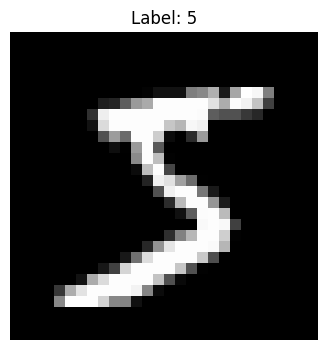

In [8]:
plt.figure(figsize=(4,4))
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()


In [9]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [10]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [11]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [13]:
history = model.fit(
    x_train,
    y_train,
    epochs=5,
    validation_data=(x_test, y_test)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - accuracy: 0.9061 - loss: 0.3106 - val_accuracy: 0.9840 - val_loss: 0.0491
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 31ms/step - accuracy: 0.9861 - loss: 0.0461 - val_accuracy: 0.9834 - val_loss: 0.0475
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9903 - loss: 0.0303 - val_accuracy: 0.9910 - val_loss: 0.0269
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9937 - loss: 0.0216 - val_accuracy: 0.9899 - val_loss: 0.0293
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - accuracy: 0.9947 - loss: 0.0164 - val_accuracy: 0.9890 - val_loss: 0.0328


In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9855 - loss: 0.0419
Test Accuracy: 0.9890000224113464


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


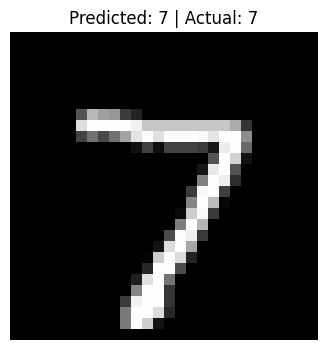

In [15]:
prediction = model.predict(x_test)

plt.figure(figsize=(4,4))
plt.imshow(x_test[0].reshape(28,28), cmap='gray')
plt.title(f"Predicted: {np.argmax(prediction[0])} | Actual: {y_test[0]}")
plt.axis('off')
plt.show()



313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


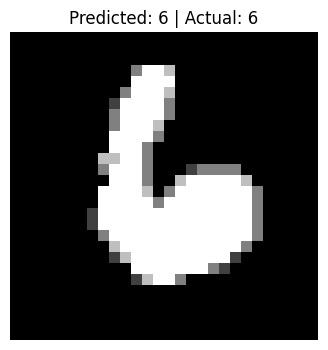

In [17]:
import random

index = random.randint(0, len(x_test)-1)

prediction = model.predict(x_test)

plt.figure(figsize=(4,4))
plt.imshow(x_test[index].reshape(28,28), cmap='gray')
plt.title(f"Predicted: {np.argmax(prediction[index])} | Actual: {y_test[index]}")
plt.axis('off')
plt.show()
